In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [110]:
import os
import random
import warnings

# To plot pretty figures
import matplotlib
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [111]:
try:
    os.chdir(os.path.join(os.getcwd(), 'hw'))
    print(os.getcwd())
except:
    pass

 # Homework 12

 - Implement a Perceptron.
 - Train and test it for the Iris data set below
 - visualise the data points and the decission boundry of your trained Perceptron on a 2D plot (petal length vs petal width)
 - compare to sklearn implementation

In [112]:

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 12, 10


#import os

warnings.filterwarnings('ignore')


# to make this notebook's output stable across runs
np.random.seed(21)


In [113]:

iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
# check only if it's an Iris-Setosa (1), or no (0)
y = (iris.target == 0).astype(np.int)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [115]:
sklearn_perceptron = SklearnPerceptron()
sklearn_perceptron.fit(X_train, y_train)
sklearn_accuracy = sklearn_perceptron.score(X_test, y_test)
print("Sklearn accuracy:", sklearn_accuracy)


Sklearn accuracy: 0.9736842105263158


 # Perceptron Class

In [116]:


def sigmoid(x):
    return 1/(1 + np.exp(-x))


def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))

In [117]:


class Perceptron:
    def __init__(self, alpha=0.01, reps=1000):
        self.alpha = alpha
        self.reps = reps

    def fit(self, X, y):
        self.X = X
        self.y = y
        # weights
        self.sample_count, self.feature_count = len(self.y), len(X[0])
        self.weights = list()
        for i in range(self.feature_count):
            self.weights.append(random.random())
        self.bias = random.random()
        self.compute()

    def predict(self, X):
        return [sigmoid(self.calc_poly(x)) for x in X]

    def score(self, X_test, y_test):
        count = 0
        y_predicted = self.predict(X_test)
        for j in range(len(y_predicted)):
            if (y_predicted[j] < .5 and y_test[j] == 0) or (y_predicted[j] >= .5 and y_test[j] == 1):
                count += 1
        return count / len(y_test)

    def compute(self):
        weights = np.zeros(self.feature_count)
        for _i in range(self.reps):
            total = 0
            for j in range(self.sample_count):
                for k in range(self.feature_count):
                    weights[k] = self.weights[k] * self.X[j, k]
                for k in range(self.feature_count):
                    val = self.calc_poly_weights(
                        self.X[j], weights) * self.X[j, k]
                    sig_val, y = sigmoid(val), self.y[j]
                    total += abs(sig_val - y)
            for k in range(self.feature_count):
                self.weights[k] -= (self.alpha/self.sample_count) * total
            self.bias -= (self.alpha/self.sample_count) * total

    def calc_poly(self, X):
        y = 0
        for k in range(len(X)):
            y += X[k] * self.weights[k]
        y += self.bias
        return y

    def calc_poly_weights(self, X, weights):
        y = 0
        for k in range(len(X)):
            y += X[k] * weights[k]
        y += self.bias
        return y



In [118]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
my_accuracy = perceptron.score(X_test, y_test)
print("My accuracy:", my_accuracy)


My accuracy: 0.6578947368421053


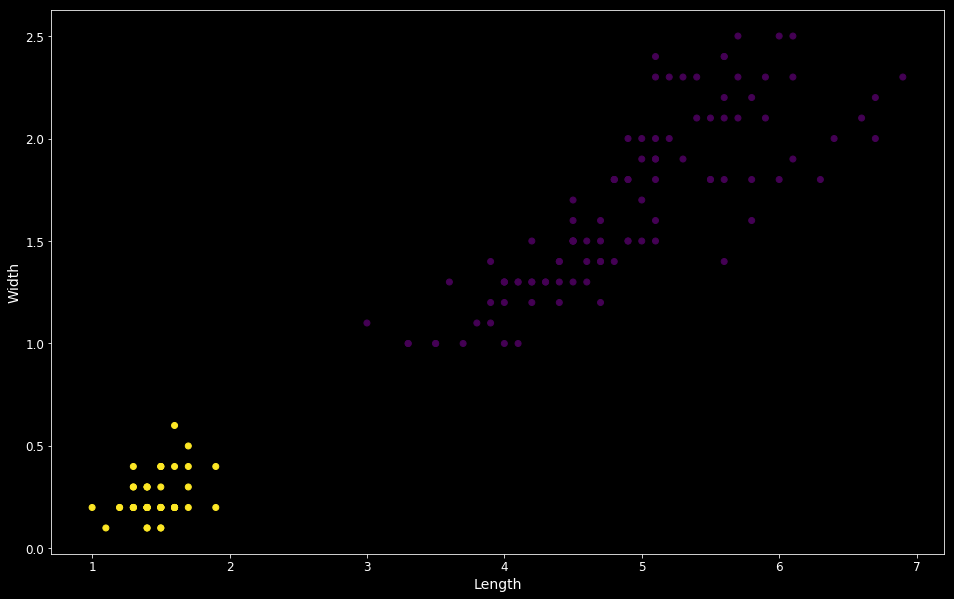

In [119]:

plt.figure(figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()


In [120]:
[w1, w2], bias = perceptron.weights, perceptron.bias
w1, w2, bias


(-5.611329376164188, -5.738740184527649, -5.520756857232511)

In [121]:
x_result = -bias/w1
y_result = -bias/w2
d = y_result
c = -y_result/x_result
x_result *= max(X[:, 1])
y_result *= max(X[:, 0])
print(x_result, y_result, d, c)



-2.4596474770682635 -6.637906768737911 -0.962015473730132 -0.9777981221894353


In [122]:
x_border = np.array([- 2*x_result, 0])
y_border = c * -x_border[::-1]/2 + d
print(x_border, y_border)



[4.91929495 0.        ] [-0.96201547  1.44302321]


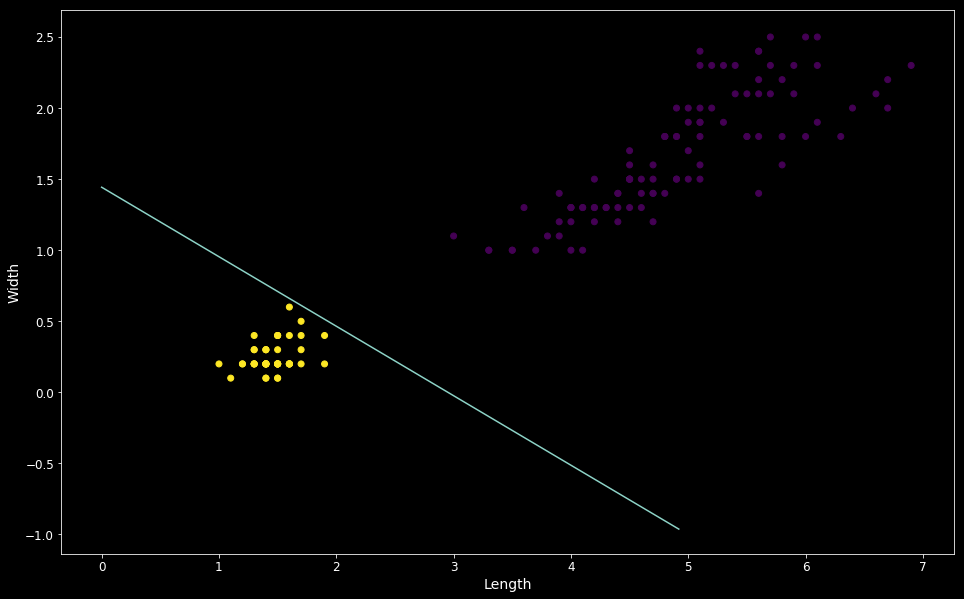

In [123]:
plt.figure(figsize=(16, 10))
plt.plot(x_border, y_border)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

